In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['axes.edgecolor']='black'
matplotlib.rcParams['xtick.color']='black'
matplotlib.rcParams['ytick.color']='black'
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["black", "#e94cdc", "0.7"])
matplotlib.rcParams['axes.linewidth']=1.3
matplotlib.rcParams['text.color']='black'
from statsmodels.tsa.api import VAR
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
matplotlib.rcParams['figure.figsize'] = (10, 6)

### –ó–∞–¥–∞—á–∞ 3

–í—ã —Ä–∞—Å–ø–æ–ª–∞–≥–∞–µ—Ç–µ –¥–∞–Ω–Ω—ã–º–∏ –æ –¥–∏–Ω–∞–º–∏–∫–µ –ø–æ–ø—É–ª—è—Ü–∏–π –ª–∏—Å –∏ –∫—Ä–æ–ª–∏–∫–æ–≤ –≤ –Ω–µ–∫–æ—Ç–æ—Ä–æ–º —Ä–µ–≥–∏–æ–Ω–µ (—Ñ–∞–π–ª fox_rabbit). –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ —á–∏—Å–ª–µ–Ω–Ω–æ—Å—Ç–∏ —ç—Ç–∏—Ö –ø–æ–ø—É–ª—è—Ü–∏–π –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω—ã –º–µ–∂–¥—É —Å–æ–±–æ–π –∏ –æ–ø–∏—Å—ã–≤–∞—é—Ç—Å—è –º–æ–¥–µ–ª—å—é –≤–µ–∫—Ç–æ—Ä–Ω–æ–π –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ VAR(p).

(–∞) –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –ø–æ—Ä—è–¥–æ–∫ –ª–∞–≥–∞ –¥–ª—è VAR –º–æ–¥–µ–ª–∏, –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–π –∫—Ä–∏—Ç–µ—Ä–∏–π –®–≤–∞—Ä—Ü–∞.

(–±) –û—Ü–µ–Ω–∏—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏. –ó–∞–ø–∏—à–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —É—Ä–∞–≤–Ω–µ–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –≤ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–π —Ñ–æ—Ä–º–µ, —É–∫–∞–∑–∞–≤ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –∏ (–≤ —Å–∫–æ–±–∫–∞—Ö –ø–æ–¥ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–∞–º–∏) —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –æ—à–∏–±–∫–∏. –£–∫–∞–∂–∏—Ç–µ, –∫–∞–∫–∏–µ –∏–∑ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —è–≤–ª—è—é—Ç—Å—è –∑–Ω–∞—á–∏–º—ã–º–∏ –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 1%.

(–≤) –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –ø—Ä–æ–≥–Ω–æ–∑ –ø–æ–ø—É–ª—è—Ü–∏–∏ –∫—Ä–æ–ª–∏–∫–æ–≤ –Ω–∞ –æ–¥–∏–Ω –ø–µ—Ä–∏–æ–¥ –≤–ø–µ—Ä–µ–¥, —É–∫–∞–∂–∏—Ç–µ 95-–ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–π –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª –ø—Ä–æ–≥–Ω–æ–∑–∞.

(–≥) –î–æ–ø—É—Å—Ç–∏–º, –≤ –≤–∞—à–µ–º —Ä–∞—Å–ø–æ—Ä—è–∂–µ–Ω–∏–∏ –Ω–µ—Ç –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –∞ –µ—Å—Ç—å —Ç–æ–ª—å–∫–æ —É—Ä–∞–≤–Ω–µ–Ω–∏—è,
–æ—Ü–µ–Ω–µ–Ω–Ω—ã–µ –≤ –ø—É–Ω–∫—Ç–µ (–±). –í—ã—á–∏—Å–ª–∏—Ç–µ —Ä–∞–≤–Ω–æ–≤–µ—Å–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å (–±–µ–∑—É—Å–ª–æ–≤–Ω–æ–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ) —á–∏—Å–ª–µ–Ω–Ω–æ—Å—Ç–∏ –ª–∏—Å –≤ —Ä–µ–≥–∏–æ–Ω–µ. –ü—Ä–∏–≤–µ–¥–∏—Ç–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ —Ä–∞—Å—á–µ—Ç—ã.

(–¥) –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ –æ—Ç–∫–ª–∏–∫–∞ —Ñ—É–Ω–∫—Ü–∏–∏ –Ω–∞ –∏–º–ø—É–ª—å—Å, —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É—é—â–∏–π –¥–∏–Ω–∞–º–∏–∫—É —á–∏—Å–ª–µ–Ω–Ω–æ—Å—Ç–∏ –ª–∏—Å –≤ –æ—Ç–≤–µ—Ç –Ω–∞ –∏–º–ø—É–ª—å—Å —á–∏—Å–ª–µ–Ω–Ω–æ—Å—Ç–∏ –∫—Ä–æ–ª–∏–∫–æ–≤. –ü–æ—è—Å–Ω–∏—Ç–µ, –∫–∞–∫–∏–µ –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ü–∏–æ–Ω–Ω—ã–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –≤—ã –∏—Å–ø–æ–ª—å–∑—É–µ—Ç–µ. –î–∞–π—Ç–µ —Å–æ–¥–µ—Ä–∂–∞—Ç–µ–ª—å–Ω—É—é –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—é —Ç–∞–∫–æ–≥–æ –≤–∏–¥–∞ –≥—Ä–∞—Ñ–∏–∫–∞.

(–µ) –î–ª—è –¥–≤—É—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –∏–º–µ—é—â–∏—Ö—Å—è –≤ –≤–∞—à–µ–º —Ä–∞—Å–ø–æ—Ä—è–∂–µ–Ω–∏–∏, –æ—Å—É—â–µ—Å—Ç–≤–∏—Ç–µ —Ç–µ—Å—Ç –ì—Ä–µ–π–Ω–∂–µ—Ä–∞ –Ω–∞ –ø—Ä–∏—á–∏–Ω–Ω–æ-—Å–ª–µ–¥—Å—Ç–≤–µ–Ω–Ω—É—é —Å–≤—è–∑—å –∏ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–π—Ç–µ –µ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

In [6]:
dat = pd.read_excel('/Users/anton.andreytsev/Downloads/fox_rabbit.xls')

In [7]:
dat.head()

fox  rabbit
0  13.997   5.987
1  13.994   6.008
2  14.013   6.024
3  13.997   6.003
4  14.011   5.992

–ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ AIC –∏ BIC

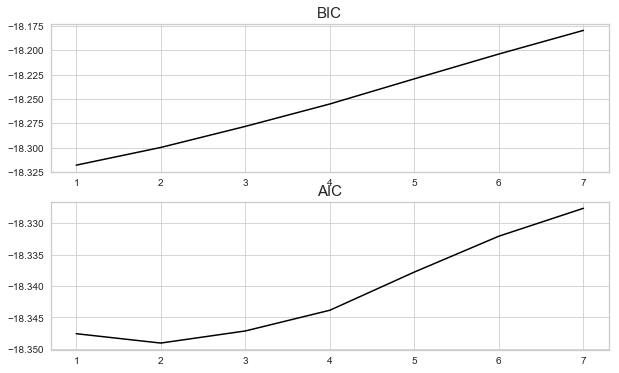

<Figure size 720x720 with 0 Axes>

In [116]:
bic = []
aic = []
lags = list(range(1, 7+1))
for lag in lags:
    model_fox_rabbit = VAR(dat).fit(lag)
    bic.append(model_fox_rabbit.bic)
    aic.append(model_fox_rabbit.aic)
    
fig, ax = plt.subplots(nrows=2, ncols=1);
plt.figure(figsize=(10, 10));
ax[0].set_title('BIC', fontsize=15)
ax[0].plot(lags, bic);
ax[1].set_title('AIC', fontsize=15)
ax[1].plot(lags, aic);

–ê–≤—Ç–æ–ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [70]:
# –ê–≤—Ç–æ–ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
model_fox_rabbit = VAR(dat)
a = model_fox_rabbit.select_order(5)
a.selected_orders

{'aic': 2, 'bic': 1, 'hqic': 1, 'fpe': 2}

–û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏

In [127]:
model_fox_rabbit = VAR(dat).fit(2)
print(model_fox_rabbit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, May, 2019
Time:                     13:49:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -18.2999
Nobs:                     998.000    HQIC:                  -18.3304
Log likelihood:           6333.98    FPE:                1.07424e-08
AIC:                     -18.3491    Det(Omega_mle):     1.06355e-08
--------------------------------------------------------------------
Results for equation fox
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             3.708628         0.486001            7.631           0.000
L1.fox            0.505674         0.031729           15.937           0.000
L1.rabbit         0.480167         0.031207           15.386           0.000
L

–û—Ü–µ–Ω—ë–Ω–Ω–∞—è –º–æ–¥–µ–ª—å –≤ —Å–∫–∞–ª—è—Ä–Ω–æ–π —Ñ–æ—Ä–º–µ

$\hat{fox}_{t} = \underset{(0.49)}{3.71} + \underset{(0.03)}{0.51} \cdot fox_{t-1} + \underset{(0.03)}{0.48} \cdot rabbit_{t-1} + \underset{(0.03)}{0.02} \cdot fox_{t-2} + \underset{(0.03)}{0.006} \cdot rabbit_{t-2}$

$\hat{rabbit}_{t} = \underset{(0.49)}{9.15} - \underset{(0.03)}{0.54} \cdot fox_{t-1} + \underset{(0.03)}{0.56} \cdot rabbit_{t-1} + \underset{(0.03)}{0.08} \cdot fox_{t-2} - \underset{(0.03)}{0.04} \cdot rabbit_{t-2}$

–ü—Ä–æ–≥–Ω–æ–∑ –ø–æ–ø—É–ª—è—Ü–∏–∏ –Ω–∞ –æ–¥–∏–Ω –ø–µ—Ä–∏–æ–¥

In [105]:
forecast_1 = model_fox_rabbit.forecast(y=dat.values, steps=1)
print(forecast_1)
print('–í —Å–ª–µ–¥—É—é—â–µ–º –ø–µ—Ä–∏–æ–¥–µ –∫—Ä–æ–ª–∏–∫–æ–≤ –±—É–¥–µ—Ç {} —à—Ç—É–∫'.format(np.round(forecast_1[0][1], decimals=3)))

[[14.00518591  6.00567637]]
–í —Å–ª–µ–¥—É—é—â–µ–º –ø–µ—Ä–∏–æ–¥–µ –∫—Ä–æ–ª–∏–∫–æ–≤ –±—É–¥–µ—Ç 6.006 —à—Ç—É–∫


–í—ã—á–∏—Å–ª–µ–Ω–∏–µ –±–µ–∑—É—Å–ª–æ–≤–Ω–æ–≥–æ –º–∞—Ç –æ–∂–∏–¥–∞–Ω–∏—è

$\vec y_{t} = \vec \alpha + B \cdot \vec y_{t-1} + C \cdot \vec y_{t-2} + \vec \epsilon_{t}$

$\mathbb{E} \left( \vec y_{t} \right) = \vec \alpha + B \cdot \mathbb{E} \left( \vec y_{t-1} \right) + C \cdot \mathbb{E} \left( \vec y_{t-2} \right) \Rightarrow \vec \mu = \vec \alpha + B \cdot \vec \mu + C \cdot \vec \mu \Rightarrow \left(I - B - C  \right) \cdot \vec \mu = \vec \alpha \Rightarrow \boxed{\vec \mu = \left(I - B - C  \right)^{-1} \cdot \vec \alpha}$

In [115]:
alpha = model_fox_rabbit.intercept
B, C = model_fox_rabbit.coefs
mu = np.linalg.inv(np.eye(2) - B - C).dot(alpha)
print(mu)
print("–ë–µ–∑—É—Å–ª–æ–≤–Ω–æ–µ –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏–µ —á–∏—Å–ª–µ–Ω–Ω–æ—Å—Ç–∏ –ª–∏—Å –≤ —Ä–µ–≥–∏–æ–Ω–µ —Ä–∞–≤–Ω–æ {}".format(np.round(mu[0], decimals=3)))

[13.99979699  5.99960911]
–ë–µ–∑—É—Å–ª–æ–≤–Ω–æ–µ –º–∞—Ç–æ–∂–∏–¥–∞–Ω–∏–µ —á–∏—Å–ª–µ–Ω–Ω–æ—Å—Ç–∏ –ª–∏—Å –≤ —Ä–µ–≥–∏–æ–Ω–µ —Ä–∞–≤–Ω–æ 14.0


–ì—Ä–∞—Ñ–∏–∫–∏ –æ—Ç–∫–ª–∏–∫–∞

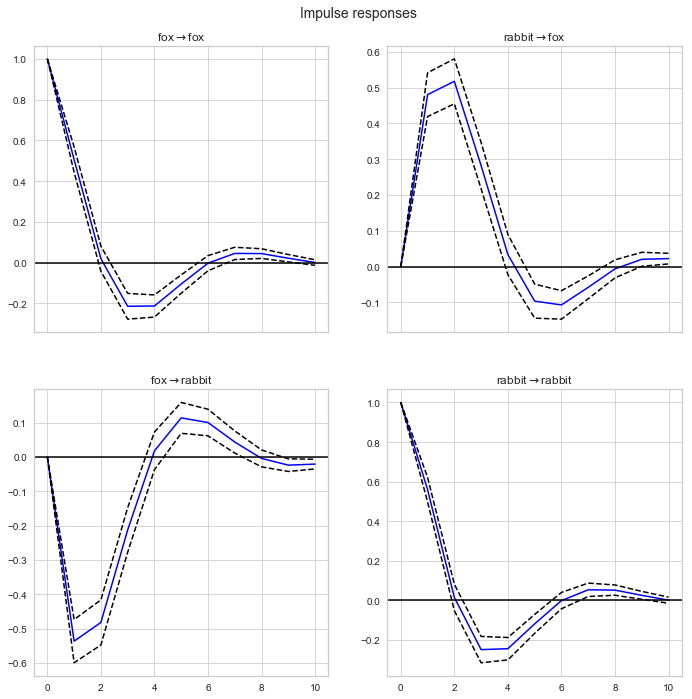

In [85]:
model_fox_rabbit.irf(periods=10).plot();

–¢–µ—Å—Ç –ì—Ä–µ–Ω–¥–∂–µ—Ä–∞

In [126]:
fox_causing_rabbit = model_fox_rabbit.test_causality(caused='rabbit', causing='fox', kind='f')
print(fox_causing_rabbit.h0)
print(fox_causing_rabbit.conclusion)

rabbit_causing_fox = model_fox_rabbit.test_causality(caused='fox', causing='rabbit', kind='f')
print(rabbit_causing_fox.h0)
print(rabbit_causing_fox.conclusion)

H_0: fox does not Granger-cause rabbit
reject
H_0: rabbit does not Granger-cause fox
reject


–ù–µ–ª—å–∑—è —Å–¥–µ–ª–∞—Ç—å –æ–¥–Ω–æ–∑–Ω–∞—á–Ω—ã–π –≤—ã–≤–æ–¥ –æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏ –≤–ª–∏—è–Ω–∏—è

### –ó–∞–¥–∞—á–∞ 4

–§–∞–π–ª —Å –¥–∞–Ω–Ω—ã–º–∏: USMacro_Quarterly. –î–∞–Ω–Ω—ã–µ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–µ.

$realGDP_{t}$ ‚Äî —Ä–µ–∞–ª—å–Ω—ã–π –í–í–ü –°–®–ê

$TBillrate_{t}$ ‚Äî –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å –ø–æ –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã–º –∫–∞–∑–Ω–∞—á–µ–π—Å–∫–∏–º –≤–µ–∫—Å–µ–ª—è–º.


(–∞) –û–≥—Ä–∞–Ω–∏—á—å—Ç–µ –≤—ã–±–æ—Ä–∫—É –ø–µ—Ä–∏–æ–¥–æ–º 1955:1 ‚Äì 2009:4. –°–æ–∑–¥–∞–π—Ç–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é $\Delta y_{t}$, –≥–¥–µ
$ y_{t} = \log realGDP_{t}$. –°–æ–∑–¥–∞–Ω–Ω–∞—è —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑—É–µ—Ç —Ç–µ–º–ø –ø—Ä–∏—Ä–æ—Å—Ç–∞ —Ä–µ–∞–ª—å–Ω–æ–≥–æ –í–í–ü. –°–æ–∑–¥–∞–π—Ç–µ –∞–Ω–∞–ª–æ–≥–∏—á–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é $\Delta R_{t}$, –≥–¥–µ $R_{t} = \log TBillrate_{t}$.

(–±) –¢–µ—Å—Ç–∏—Ä—É–π—Ç–µ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö $\Delta y_{t}$ –∏ $\Delta R_{t}$.

(–≤) –û—Ü–µ–Ω–∏—Ç–µ –º–æ–¥–µ–ª—å VAR(4) –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö $\Delta y_{t}$ –∏ $\Delta R_{t}$. –Ø–≤–ª—è–µ—Ç—Å—è –ª–∏ ‚àÜùëåùë° –ø—Ä–∏—á–∏–Ω–æ–π –ø–æ –ì—Ä–µ–π–Ω–∂–µ—Ä—É –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π $\Delta R_{t}$? –ê –Ω–∞–æ–±–æ—Ä–æ—Ç? –ü–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –ª–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω–∞—è –º–æ–¥–µ–ª—å —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–µ—Ö–∞–Ω–∏–∑–º–∞ –∫—Ä–µ–¥–∏—Ç–Ω–æ-–¥–µ–Ω–µ–∂–Ω–æ–π —Ç—Ä–∞–Ω—Å–º–∏—Å—Å–∏–∏?

In [134]:
dat = pd.read_excel('/Users/anton.andreytsev/Downloads/UsMacro_Quarterly.xlsx')
index1 = dat.loc[(dat.Year == 1955)&(dat.Quarter == 1)].index[0]
index2 = dat.loc[(dat.Year == 2009)&(dat.Quarter == 4)].index[0]
dat = dat.loc[index1:index2]

In [135]:
dat.head()

Year  Quarter   RealGDP  TBillRate
32  1955        1  2449.748   1.223333
33  1955        2  2490.274   1.483333
34  1955        3  2523.548   1.856667
35  1955        4  2537.637   2.336667
36  1956        1  2526.058   2.326667

In [138]:
delta_y = np.diff(np.log(dat.RealGDP))
delta_r = np.diff(np.log(dat.TBillRate))

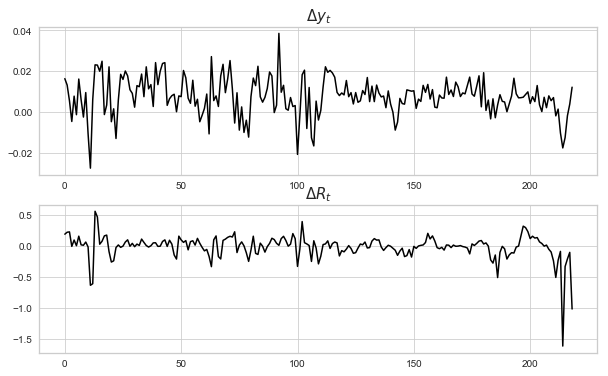

<Figure size 720x720 with 0 Axes>

In [142]:
fig, ax = plt.subplots(nrows=2, ncols=1);
plt.figure(figsize=(10, 10));
ax[0].set_title('$\Delta y_{t}$', fontsize=15)
ax[0].plot(delta_y);
ax[1].set_title('$\Delta R_{t}$', fontsize=15)
ax[1].plot(delta_r);

"–ù–∞ –≥–ª–∞–∑" –æ–±–∞ —Ä—è–¥–∞ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–µ, –∏—Å–ø–æ–ª—å–∑—É–µ–º —Ñ–æ—Ä–º–∞–ª—å–Ω—ã–µ —Å—Ç–∞—Ç —Ç–µ—Å—Ç—ã

In [143]:
from statsmodels.tsa.stattools import adfuller, kpss

In [148]:
print('–î–∏–∫–∏-–§—É–ª–ª–µ—Ä p-value –¥–ª—è delta_y: {}'.format(adfuller(delta_y)[1]))
print('–î–∏–∫–∏-–§—É–ª–ª–µ—Ä p-value –¥–ª—è delta_r: {}'.format(adfuller(delta_r)[1]))
print('KPSS p-value –¥–ª—è delta_y: {}'.format(kpss(delta_y)[1]))
print('KPSS p-value –¥–ª—è delta_r: {}'.format(kpss(delta_r)[1]))

–î–∏–∫–∏-–§—É–ª–ª–µ—Ä p-value –¥–ª—è delta_y: 2.206041681613593e-11
–î–∏–∫–∏-–§—É–ª–ª–µ—Ä p-value –¥–ª—è delta_r: 0.006556085420125244
KPSS p-value –¥–ª—è delta_y: 0.1
KPSS p-value –¥–ª—è delta_r: 0.05872111360780326


–û–±–∞ —Ç–µ—Å—Ç–∞ –Ω–∞ 1% —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –ø—Ä–∏–Ω–∏–º–∞—é—Ç –≥–∏–ø–æ—Ç–µ–∑—É –æ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç–∏ –æ–±–æ–∏—Ö —Ä—è–¥–æ–≤

–û—Ü–µ–Ω–∏–≤–∞–Ω–∏–µ Var(4)

In [156]:
dat_delta = pd.DataFrame([delta_r, delta_y]).T
dat_delta.columns = ['delta_r', 'delta_y']

In [158]:
model_macro = VAR(dat_delta).fit(4)
print(model_macro.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, May, 2019
Time:                     14:19:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -12.8595
Nobs:                     215.000    HQIC:                  -13.0277
Log likelihood:           820.592    FPE:                1.96185e-06
AIC:                     -13.1417    Det(Omega_mle):     1.80736e-06
--------------------------------------------------------------------
Results for equation delta_r
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.056805         0.021612           -2.628           0.009
L1.delta_r         0.192928         0.075367            2.560           0.010
L1.delta_y         6.522154         1.411320            4.621         

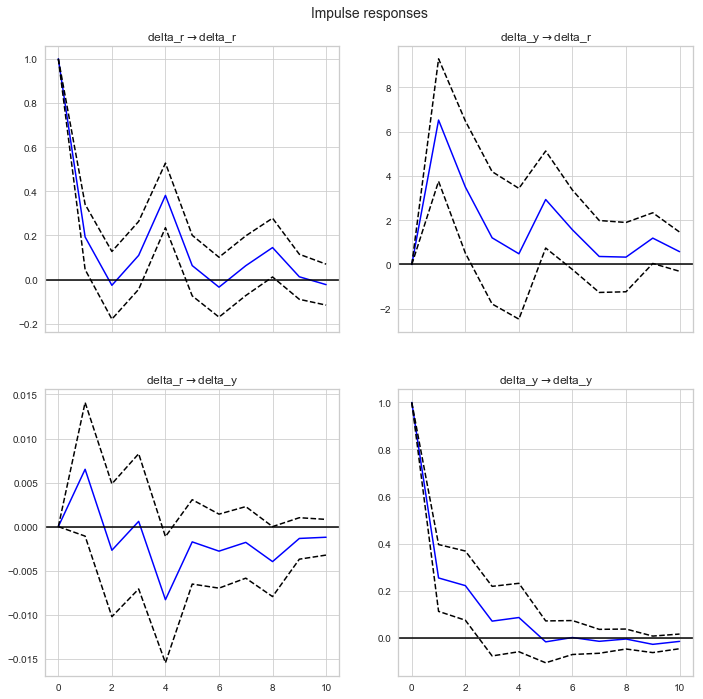

In [160]:
model_macro.irf().plot();

In [162]:
y_causing_r = model_macro.test_causality(caused='delta_r', causing='delta_y', kind='f')
print(y_causing_r.h0)
print(y_causing_r.conclusion)

r_causing_y = model_macro.test_causality(caused='delta_y', causing='delta_r', kind='f')
print(r_causing_y.h0)
print(r_causing_y.conclusion)

H_0: delta_y does not Granger-cause delta_r
reject
H_0: delta_r does not Granger-cause delta_y
fail to reject


–ò—Å—Ö–æ–¥—è –∏–∑ —Ç–µ—Å—Ç–∞ –ì—Ä–µ–π–Ω–¥–∂–µ—Ä–∞ –ø—Ä–∏–Ω–∏–º–∞–µ–º –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ç–æ–º, —á—Ç–æ delta_y —è–≤—è–µ—Ç—Å—è "–ø—Ä–∏—á–∏–Ω–æ–π –ø–æ –ì—Ä–µ–π–Ω–¥–∂–µ—Ä—É" –¥–ª—è delta_r

### –ó–∞–¥–∞—á–∞ 5

–ò–º–µ–µ—Ç—Å—è SVAR-–º–æ–¥–µ–ª—å –≤ —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω–æ–π —Ñ–æ—Ä–º–µ:

$\begin{aligned} y_{1 t} &=8-0,5 y_{2 t}+0,4 y_{1 t-1}+0,2 y_{2 t-1}+\varepsilon_{1 t} \\ y_{2 t} &=16-0,4 y_{1 t}+0,4 y_{1 t-1}+0,2 y_{2 t-1}+\varepsilon_{2 t} \end{aligned}$

$E\left(\varepsilon_{1 t}\right)=E\left(\varepsilon_{2 t}\right)=\operatorname{cov}\left(\varepsilon_{1 t}, \varepsilon_{2 t}\right)=0, \operatorname{var}\left(\varepsilon_{1 t}\right)=2, \operatorname{var}\left(\varepsilon_{2 t}\right)=4$

(–∞) –í—ã–ø–∏—à–∏—Ç–µ –º–æ–¥–µ–ª—å –≤ –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω–æ–π —Ñ–æ—Ä–º–µ.

(–±) –ù–∞–π–¥–∏—Ç–µ –∫–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É —Å–ª—É—á–∞–π–Ω—ã—Ö –æ—à–∏–±–æ–∫ –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω–æ–π —Ñ–æ—Ä–º—ã:
    
$\left( \begin{array}{cc}{E u_{1 t}^{2}} & {E u_{1 t} u_{2 t}} \\ {E u_{1 t} u_{2 t}} & {E u_{2 t}^{2}}\end{array}\right)$

(–≤) –í—ã—á–∏—Å–ª–∏—Ç–µ —Ç—Ä–∏ –ø–µ—Ä–≤—ã—Ö —ç–ª–µ–º–µ–Ω—Ç–∞ —Ñ—É–Ω–∫—Ü–∏–∏ –∏–º–ø—É–ª—å—Å–Ω–æ–≥–æ –æ—Ç–∫–ª–∏–∫–∞ 1-–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
–Ω–∞ –µ–¥–∏–Ω–∏—á–Ω—ã–π —à–æ–∫ 2-–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

–í–≤–µ–¥—ë–º –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏–µ $f_{t} = \begin{pmatrix} f_{1} \\ f_{2} \end{pmatrix}_{t}$, —Ç–æ–≥–¥–∞ SVAR –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –≤–∏–¥:

$\underbrace{\begin{pmatrix} 1 & 0.5 \\ 0.4 & 1   \end{pmatrix}}_{A} \cdot y_{t} = \underbrace{\begin{pmatrix}  8 \\ 16  \end{pmatrix}}_{\alpha} + \underbrace{\begin{pmatrix} 0.4 & 0.2 \\ 0.4 & 0.2   \end{pmatrix}}_{B} \cdot y_{t-1} + \epsilon_{t} \Rightarrow A \cdot y_{t} = \alpha + B \cdot y_{t-1} + \epsilon_{t}$

–û—Ç—Å—é–¥–∞ –ø–æ–ª—É—á–∞–µ–º, —á—Ç–æ –ø—Ä–∏–≤–µ–¥—ë–Ω–Ω–∞—è —Ñ–æ—Ä–º–∞ –∏–º–µ–µ—Ç –≤–∏–¥:

$y_{t} = A^{-1} \cdot \alpha + A^{-1} \cdot B \cdot y_{t-1} + A^{-1} \cdot \epsilon_{t} = a + C \cdot y_{t-1} + u_{t}$

In [6]:
A = np.array([[1 ,0.5], 
              [0.4, 1]])

B = np.array([[0.4, 0.2], 
              [0.4, 0.2]])

alpha = np.array([8, 16])

In [12]:
a = np.linalg.inv(A).dot(alpha)
C = np.linalg.inv(A).dot(B)
u = np.linalg.inv(A)
print(a)
print()
print(C)
print()
print(u)

[ 0. 16.]

[[0.25  0.125]
 [0.3   0.15 ]]

[[ 1.25  -0.625]
 [-0.5    1.25 ]]


–ü—Ä–∏–≤–µ–¥—ë–Ω–Ω–∞—è —Ñ–æ—Ä–º–∞

$y_{t} = \begin{pmatrix} 0 \\ 16 \end{pmatrix} + \begin{pmatrix} 0.25 & 0.125 \\ 0.3 & 0.15  \end{pmatrix} \cdot y_{t-1} + \begin{pmatrix} 1.25 & -0.625 \\ -0.5 & 1.25 \end{pmatrix} \cdot \epsilon_{t}$

In [13]:
u.dot(np.diag([2, 4])).dot(u.T)

array([[ 4.6875, -4.375 ],
       [-4.375 ,  6.75  ]])

–ö–æ–≤–∞—Ä–∏–∞—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ —Å–ª—É—á–∞–π–Ω—ã—Ö –æ—à–∏–±–æ–∫ –ø—Ä–∏–≤–µ–¥—ë–Ω–Ω–æ–π —Ñ–æ—Ä–º—ã –±—É–¥–µ—Ç –∏–º–µ—Ç—å –≤–∏–¥:

$\mathbb{D}(u_{t}) = \mathbb{D}(A^{-1} \epsilon_{t}) = A^{-1} \cdot \mathbb{D}(\epsilon_{t}) \cdot A^{-T} = \begin{pmatrix} 1.25 & -0.625 \\ -0.5 & 1.25 \end{pmatrix} \cdot \begin{pmatrix} 2 & 0 \\ 0 & 4 \end{pmatrix} \cdot \begin{pmatrix} 1.25 & -0.5 \\ -0.625 & 1.25 \end{pmatrix} = \begin{pmatrix} 4.688 & -4.375 \\ -4.375 & 6.75 \end{pmatrix}$

–î–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è —Ñ—É–Ω–∫—Ü–∏–∏ –æ—Ç–∫–ª–∏–∫–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏–º –ø—Ä–∏–≤–µ–¥—ë–Ω–Ω—É—é —Ñ–æ—Ä–º—É –≤ –≤–∏–¥–µ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ–≥–æ –ú–ê –ø—Ä–æ—Ü–µ—Å—Å–∞

$y_{t} = a + C \cdot y_{t-1} + u_{t} = a + C \cdot L \cdot  y_{t} + u_{t} \Rightarrow (I - CL)y_{t} = a + u_{t} \Rightarrow y_{t} = (I - CL)^{-1}a + (I - CL)^{-1}u_{t} \ $,  –≥–¥–µ L - –ª–∞–≥–æ–≤—ã–π –æ–ø–µ—Ä–∞—Ç–æ—Ä ($L(f_{t}) = f_{t-1}$)

–ò—Å–ø–æ–ª—å–∑—É—è —Ñ–∞–∫—Ç, —á—Ç–æ $(I - CL)^{-1} = \sum\limits_{i=0}^{\infty} C^{i}L^{i}$, –ø–æ–ª—É—á–∞–µ–º

$y_{t} = \underbrace{(I - C)^{-1}a}_{\mu} + \sum\limits_{i=0}^{\infty} C^{i}\underbrace{L^{i}u_{t}}_{u_{t-i}} = \mu + \sum\limits_{i=0}^{\infty} C^{i}A^{-1}\epsilon_{t-i}$

–¢–æ–≥–¥–∞ (p, q) —ç–ª–µ–º–µ–Ω—Ç –º–∞—Ç—Ä–∏—Ü—ã $C^{i}A^{-1}$ –∏ –±—É–¥–µ—Ç –æ—Ç–∫–ª–∏–∫–æ–º p-–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–∞ –µ–¥–∏–Ω–∏—á–Ω—ã–π —à–æ–∫ q-–æ–π —ç–∫–∑–æ–≥–µ–Ω–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π —á–µ—Ä–µ–∑ i –ø–µ—Ä–∏–æ–¥–æ–≤

In [21]:
np.linalg.matrix_power(C, 0).dot(np.linalg.inv(A))

array([[ 1.25 , -0.625],
       [-0.5  ,  1.25 ]])

–æ—Ç–∫–ª–∏–∫ 1–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–∞ —à–æ–∫ –≤—Ç–æ—Ä–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ –ø–µ—Ä–≤–æ–º –ø–µ—Ä–∏–æ–¥–µ —Ä–∞–≤–µ–Ω -0.625

In [22]:
np.linalg.matrix_power(C, 1).dot(np.linalg.inv(A))

array([[0.25, 0.  ],
       [0.3 , 0.  ]])

–æ—Ç–∫–ª–∏–∫ 1–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–∞ —à–æ–∫ –≤—Ç–æ—Ä–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤–æ –≤—Ç–æ—Ä–æ–º –ø–µ—Ä–∏–æ–¥–µ —Ä–∞–≤–µ–Ω 0

In [23]:
np.linalg.matrix_power(C, 2).dot(np.linalg.inv(A))

array([[0.1 , 0.  ],
       [0.12, 0.  ]])

–æ—Ç–∫–ª–∏–∫ 1–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –Ω–∞ —à–æ–∫ –≤—Ç–æ—Ä–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –≤ —Ç—Ä–µ—Ç—å–µ–º –ø–µ—Ä–∏–æ–¥–µ —Ä–∞–≤–µ–Ω 0